In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import io



In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 3.8 MB/s 


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas_datareader.data as web
import math
import os
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime as dt

# Loading the tweeet content data


In [ ]:
df = pd.read_excel('export_dashboard_ea_2016_06_15_12_43_03_filt.xlsx')


In [ ]:
df.tail()

,Tweet Id,Date,Hour,User Name,Tweet content,Followers
4990,714247266752593921,2016-03-28,00:26,Taylor,$EA there's a reason it's stalling right here....,1755.0
4991,714219957093924864,2016-03-27,22:38,Ca$h Ave. Wavy J,RT @TxUndergroundRa: @OriginalVaughn - Ave. $e...,489.0
4992,714218795447877632,2016-03-27,22:33,O.V.,RT @TxUndergroundRa: @OriginalVaughn - Ave. $e...,1024.0
4993,714217112043171840,2016-03-27,22:26,FinSentS NASDAQ,$EA:US Oculus' Virtual Reality Headset To Laun...,2746.0
4994,714211797738381312,2016-03-27,22:05,ProVesting,$EA:\n\nElectronic Arts (EA) Short Interest Di...,737.0


In [ ]:
df.head()

,Tweet Id,Date,Hour,User Name,Tweet content,Followers
0,743021277988958208,2016-06-15,10:04,bored2tears,"#VR hardware is here, but robust game lineup i...",5172.0
1,743000607397679104,2016-06-15,08:42,Ken Edwards,OVAS Pacific Biosciences of California Inc. Ex...,71.0
2,742994939777286144,2016-06-15,08:19,Abu Sofyan Pabitjara,"$EA Rf xcw€•£*cc. Ze,*$*3,r#43€•¢t,😠°==™©•√",6.0
3,742992053852852224,2016-06-15,08:08,JennaKingtin1978,FXA CurrencyShares British Pound Sterling Trus...,86.0
4,742985503641894913,2016-06-15,07:42,ezzmoney2day,CBT Cabot Corp. Yield\nhttps://t.co/0kL5KBx2QD...,58.0


In [ ]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
  
tweet = df['Tweet content'].copy()
# lower case
for i in range(len(tweet)):
  tweet[i] = tweet[i].lower()



# removing punctuation

string_p = '!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~’'

for i in range(len(tweet)):
  tweet[i] = "".join([char for char in tweet[i] if char not in string_p])


stop_words = set(stopwords.words('english'))

stop_words.add('ea')
stop_words.add('electronics')
stop_words.add('electronic')
stop_words.add('electronicarts')
stop_words.add('arts')
stop_words.add('user')
stop_words.add('url')
stop_words.add('URL')
stop_words.add('game')
stop_words.add('rt')
stop_words.add('r')
stop_words.add('t')
stop_words.add('stock')
stop_words.add('battlefield')
stop_words.add('war')
stop_words.add('stocks')
stop_words.add('atvi')


# kaggle.com/code/stoicstatic/twitter-sentiment-analysis-for-beginners/notebook
# EMoji meaning taken from kaggle
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

# Defining regex patterns.
urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*|(http)[^ ]*)"
userPattern       = '@[^\s]+'
alphaPattern      = "[^a-zA-Z0-9]"


for i in range(len(tweet)):
  for emoji in emojis.keys():
            tweet[i] = tweet[i].replace(emoji, "EMOJI" + emojis[emoji])

  # replace URL
  tweet[i] = re.sub(urlPattern,' URL',tweet[i])

  # Replace @USERNAME to 'USER'.
  tweet[i] = re.sub(userPattern,' USER', tweet[i])

  # Replace all non alphabets.
  tweet[i] = re.sub(alphaPattern, " ", tweet[i])



for i in range(len(tweet)):
  tweet[i] = word_tokenize(tweet[i])

for i in range(len(tweet)):
  tweet[i] = [w for w in tweet[i] if not w in stop_words]



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tweet_preprocessed = tweet

In [ ]:
for i in range(len(tweet)):
  tweet[i] = " ".join([char for char in tweet[i] ])


In [ ]:
df['Tweet content'][10]

'EA Direxion Daily Emerging Markets Bull 3x Shares Day Low\nhttps://t.co/HWFkIh2Gx8\n\n$EA $UA $FCX $DIS  #nasdaq #share'

In [ ]:
tweet[10]

'direxion daily emerging markets bull 3x shares day low ua fcx dis nasdaq share'

# Sentiment analysis with textblob


In [ ]:
from textblob import TextBlob
tweet_sc= tweet.apply(lambda x: TextBlob(str(x)).sentiment.polarity)



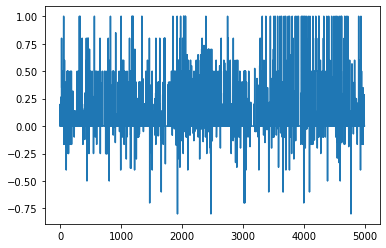

In [ ]:
plt.plot(tweet_sc)

In [ ]:
sentiment_scores_textblob = pd.DataFrame()
sentiment_scores_textblob['compound'] = tweet_sc

# Sentiment score analysis 

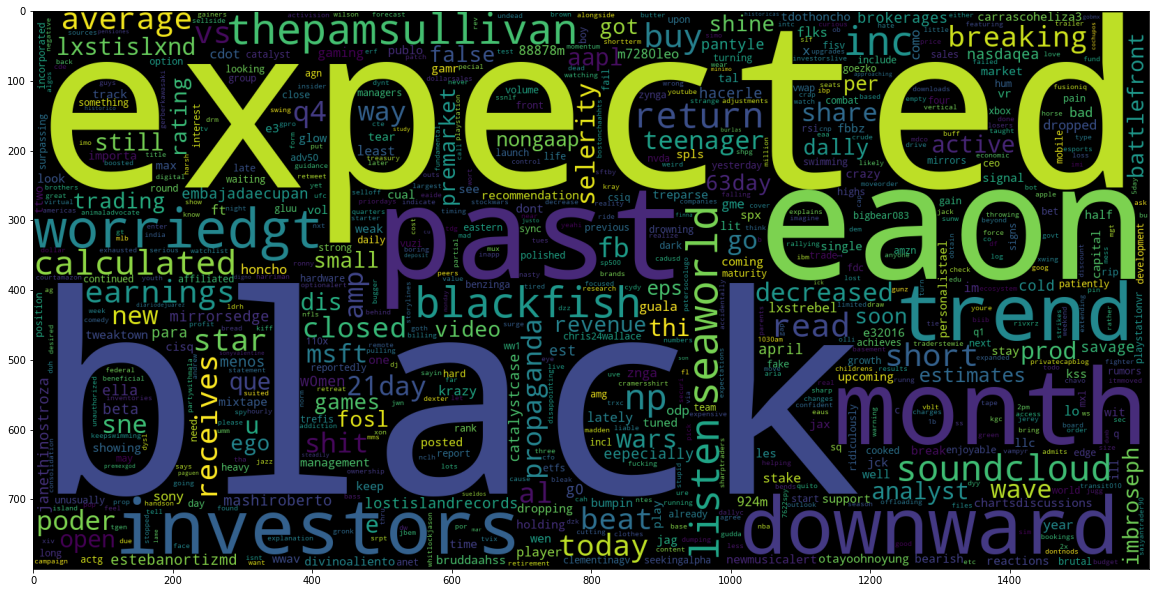

In [ ]:
sent = pd.DataFrame()
sent['tweet'] = tweet_preprocessed
sent['score'] = tweet_sc

# negtive data
sent_neg = sent[sent['score'] < -0.05]['tweet']

#positive data
sent_pos = sent[sent['score'] > 0.05]['tweet']

import seaborn as sns
from wordcloud import WordCloud

data_neg = sent_neg
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
 

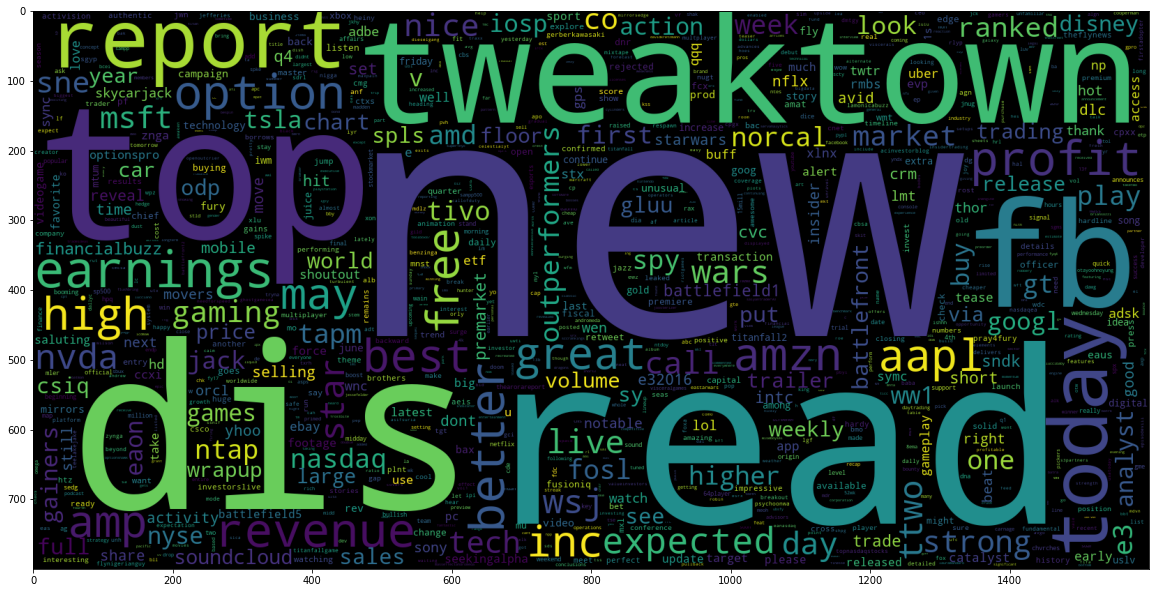

In [ ]:
data_pos = sent_pos
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

# Using Vader

In [ ]:
#ref : https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

sid_obj = SentimentIntensityAnalyzer()
scores = []
for comment in df['Tweet content']:
    vs1 = sid_obj.polarity_scores(comment)
    scores.append(vs1)
sentiment_scores = pd.DataFrame(scores)

In [ ]:
sentiment_scores['compound'].head()

0    0.4767
1    0.0000
2   -0.5106
3    0.5106
4    0.0000
Name: compound, dtype: float64

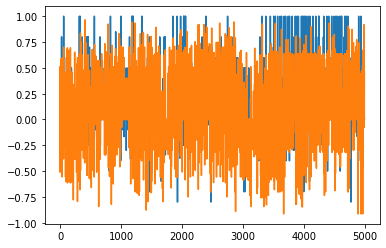

In [ ]:
plt.plot(sentiment_scores_textblob['compound'])
plt.plot(sentiment_scores['compound'])


In [ ]:
#adding sentiment scores to our data 
merged_df = pd.merge(df, sentiment_scores['compound'], left_index=True, right_index=True)
merged_df.rename(columns = {'compound':'compound_vader'}, inplace = True)
merged_df = pd.merge(merged_df, sentiment_scores_textblob['compound'], left_index=True, right_index=True)
merged_df.rename(columns = {'compound':'compound_textblob'}, inplace = True)



In [ ]:
merged_df[20:25]

,Tweet Id,Date,Hour,User Name,Tweet content,Followers,compound_vader,compound_textblob
20,742909638622859265,2016-06-15,02:40,stockfollower4u,"RLYP Relypsa, Inc. Dividend\nhttps://t.co/MC8X...",73.0,0.0000,0.000000
21,742905788230959104,2016-06-15,02:25,$HŌ̂ṦHṎ² ♯,I bought a bag of $ea $alt cracker chips @BP_p...,128.0,0.4404,0.266667
22,742899638680858624,2016-06-15,02:00,Jacob Ward,RT @intowin2017: ERY Direxion Daily Energy Bea...,966.0,0.5106,0.000000
23,742899189592383488,2016-06-15,01:59,bn201612,BLUE Company Info\nSee Here ---&gt; https://t....,59.0,0.0000,0.000000
24,742898934134116352,2016-06-15,01:58,intowin2017,ERY Direxion Daily Energy Bear 3x Shares Last ...,55.0,0.5106,0.000000


In [ ]:
for i in range(len(merged_df)):

  if (merged_df['compound_vader'][i]>=-0.05 and merged_df['compound_vader'][i]<=0.05):
    merged_df['compound_vader'][i] = 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#sentiment score mulitplied by the number of followers of the account that tweeted
merged_df['weighted_sentiment_vader'] = merged_df['compound_vader'] * merged_df['Followers']
merged_df['weighted_sentiment_textblob'] = merged_df['compound_textblob'] * merged_df['Followers']
merged_df.head(15)

,Tweet Id,Date,Hour,User Name,Tweet content,Followers,compound_vader,compound_textblob,weighted_sentiment_vader,weighted_sentiment_textblob
0,743021277988958208,2016-06-15,10:04,bored2tears,"#VR hardware is here, but robust game lineup i...",5172.0,0.4767,0.0,2465.4924,0.0
1,743000607397679104,2016-06-15,08:42,Ken Edwards,OVAS Pacific Biosciences of California Inc. Ex...,71.0,0.0000,0.0,0.0000,0.0
2,742994939777286144,2016-06-15,08:19,Abu Sofyan Pabitjara,"$EA Rf xcw€•£*cc. Ze,*$*3,r#43€•¢t,😠°==™©•√",6.0,-0.5106,0.0,-3.0636,0.0
3,742992053852852224,2016-06-15,08:08,JennaKingtin1978,FXA CurrencyShares British Pound Sterling Trus...,86.0,0.5106,0.0,43.9116,0.0
4,742985503641894913,2016-06-15,07:42,ezzmoney2day,CBT Cabot Corp. Yield\nhttps://t.co/0kL5KBx2QD...,58.0,0.0000,0.0,0.0000,0.0
5,742979880904753153,2016-06-15,07:19,~~,Listen to $teelakejake - G$U$ $EA$UN - 05 Is I...,13.0,0.0000,0.2,0.0000,2.6
6,742978721703944193,2016-06-15,07:15,Stakepool,RT @jaytrades16: PFE PennyMac Mortgage Investm...,28167.0,0.5106,0.0,14382.0702,0.0
7,742970253660000257,2016-06-15,06:41,FinSentS NASDAQ,$EA:US Electronic Arts Follows Activision Into...,2767.0,0.0000,0.0,0.0000,0.0
8,742969781234585600,2016-06-15,06:39,jaytrades16,PFE PennyMac Mortgage Investment Trust E.P.S.\...,60.0,0.5106,0.0,30.6360,0.0
9,742960490314399744,2016-06-15,06:02,Clark Joseph Kent,@EA CEO Day Is Coming When Driving $TSLA in Re...,2823.0,0.0000,0.2,0.0000,564.6


In [ ]:
merged_df = (merged_df.groupby(merged_df.Date).mean())
merged_df.head()

,Tweet Id,Followers,compound_vader,compound_textblob,weighted_sentiment_vader,weighted_sentiment_textblob
Date,,,,,,
2016-03-27,7.142169e+17,1249.000000,0.114700,0.000000,84.533900,0.000000
2016-03-28,7.144333e+17,3731.804878,0.074698,0.029437,723.898478,27.971318
2016-03-29,7.147843e+17,4476.458333,0.101644,0.092332,224.874328,569.584933
2016-03-30,7.151729e+17,1897.916667,0.209617,0.071921,206.110193,105.016754
2016-03-31,7.155232e+17,4840.074074,0.082563,0.014863,114.398100,11.711400


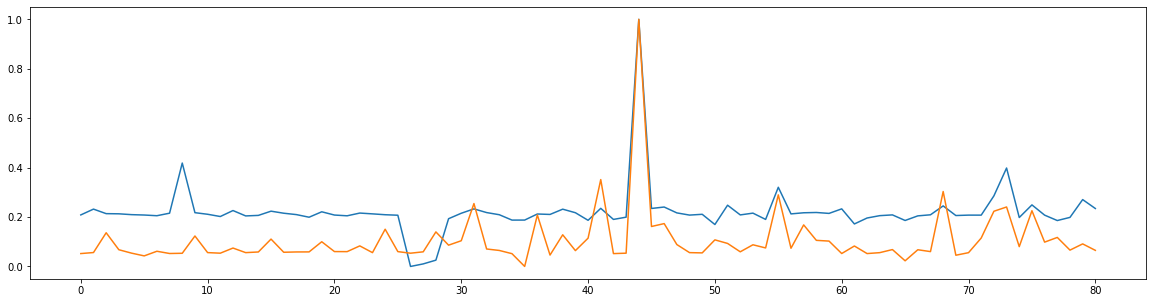

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

float_array_vader = merged_df['weighted_sentiment_vader'].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_array_vader = min_max_scaler.fit_transform(float_array_vader.reshape(-1,1))
plt.rcParams['figure.figsize'] = (20,5)
plt.plot(scaled_array_vader)

float_array_textblob = merged_df['weighted_sentiment_textblob'].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_array_textblob = min_max_scaler.fit_transform(float_array_textblob.reshape(-1,1))

plt.plot(scaled_array_textblob)





#ref : https://www.datasciencemadesimple.com/scaling-normalizing-column-pandas-dataframe-python/

In [ ]:
merged_df['scaled_weighted_sentiment_vader'] = scaled_array_vader
merged_df['scaled_weighted_sentiment_textblob'] = scaled_array_textblob

In [ ]:
merged_df.head()

,Tweet Id,Followers,compound_vader,compound_textblob,weighted_sentiment_vader,weighted_sentiment_textblob,scaled_weighted_sentiment_vader,scaled_weighted_sentiment_textblob
Date,,,,,,,,
2016-03-27,7.142169e+17,1249.000000,0.114700,0.000000,84.533900,0.000000,0.208537,0.052117
2016-03-28,7.144333e+17,3731.804878,0.074698,0.029437,723.898478,27.971318,0.232031,0.056254
2016-03-29,7.147843e+17,4476.458333,0.101644,0.092332,224.874328,569.584933,0.213694,0.136351
2016-03-30,7.151729e+17,1897.916667,0.209617,0.071921,206.110193,105.016754,0.213004,0.067648
2016-03-31,7.155232e+17,4840.074074,0.082563,0.014863,114.398100,11.711400,0.209634,0.053849


In [ ]:
len(merged_df)

81

# Reading data from yahoo finance and normalizing it

In [ ]:
df = pd.read_csv('EA.csv')
dates = df["Date"].values
df.drop(['Volume', 'Close'], 1, inplace=True)
min_max_scaler = preprocessing.MinMaxScaler()
df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
df['Adj Close'] = min_max_scaler.fit_transform(df['Adj Close'].values.reshape(-1,1))
df.set_index('Date', inplace=True)
df.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Adj Close
Date,,,,
2016-03-28,0.156005,0.165922,0.159642,0.181168
2016-03-29,0.180809,0.252712,0.213282,0.271428
2016-03-30,0.325718,0.302489,0.330779,0.296104
2016-03-31,0.299608,0.298660,0.293742,0.276624
2016-04-01,0.236292,0.236120,0.257343,0.264286


In [ ]:
len(df)

56

In [ ]:
df['change'] = (df['Adj Close'] - df['Adj Close'].shift(1)) 
df = df[1:]
df['change'].head()
#positive inc in adj closure 
#neg dec in adj closure


Date
2016-03-29    0.090260
2016-03-30    0.024676
2016-03-31   -0.019481
2016-04-01   -0.012337
2016-04-04   -0.011689
Name: change, dtype: float64

In [ ]:
#df['signal'] = df['change'].apply(lambda x: 1 if x >=0 else -1)
#1 : up trend , sell
#-1 : dowm trend , buy
df[:10]

,Open,High,Low,Adj Close,change
Date,,,,,
2016-03-29,0.180809,0.252712,0.213282,0.271428,0.090260
2016-03-30,0.325718,0.302489,0.330779,0.296104,0.024676
2016-03-31,0.299608,0.298660,0.293742,0.276624,-0.019481
2016-04-01,0.236292,0.236120,0.257343,0.264286,-0.012337
2016-04-04,0.278068,0.259732,0.273308,0.252597,-0.011689
2016-04-05,0.219321,0.225909,0.252235,0.233766,-0.018832
2016-04-06,0.256527,0.232929,0.265006,0.258441,0.024675
2016-04-07,0.258485,0.222719,0.164112,0.135065,-0.123376
2016-04-08,0.155353,0.145501,0.139208,0.155195,0.020130


In [ ]:
df = pd.merge(df, merged_df[['scaled_weighted_sentiment_vader','scaled_weighted_sentiment_textblob']],left_index=True, right_index=True)
df.head()


,Open,High,Low,Adj Close,change,scaled_weighted_sentiment_vader,scaled_weighted_sentiment_textblob
Date,,,,,,,
2016-03-29,0.180809,0.252712,0.213282,0.271428,0.090260,0.213694,0.136351
2016-03-30,0.325718,0.302489,0.330779,0.296104,0.024676,0.213004,0.067648
2016-03-31,0.299608,0.298660,0.293742,0.276624,-0.019481,0.209634,0.053849
2016-04-01,0.236292,0.236120,0.257343,0.264286,-0.012337,0.208101,0.042725
2016-04-04,0.278068,0.259732,0.273308,0.252597,-0.011689,0.418465,0.053300


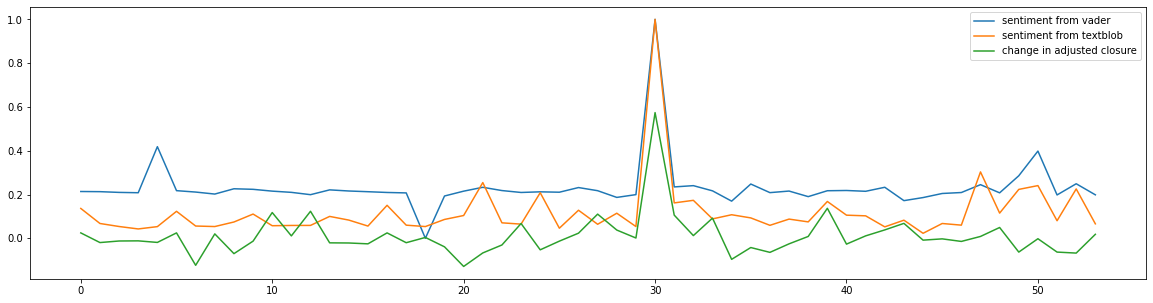

In [ ]:
plt.plot(df['scaled_weighted_sentiment_vader'][:-1].values, label = 'sentiment from vader')
plt.plot(df['scaled_weighted_sentiment_textblob'][:-1].values, label = 'sentiment from textblob')
plt.plot(df['change'][1:].values, label = 'change in adjusted closure')
plt.legend()


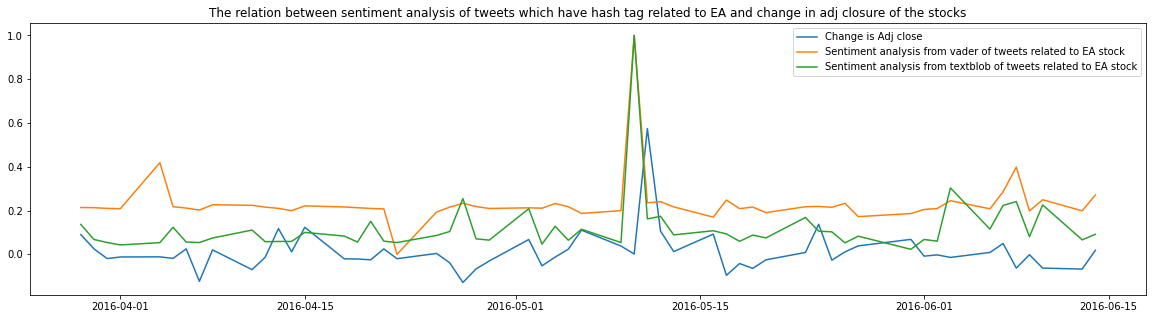

In [ ]:
df.index = pd.to_datetime(df.index)
plt.rcParams['figure.figsize'] = (20,5)
plt.plot(df['change'],label = 'Change is Adj close')
plt.plot(df['scaled_weighted_sentiment_vader'], label = 'Sentiment analysis from vader of tweets related to EA stock')
plt.plot(df['scaled_weighted_sentiment_textblob'], label = 'Sentiment analysis from textblob of tweets related to EA stock')
plt.title("The relation between sentiment analysis of tweets which have hash tag related to EA and change in adj closure of the stocks")
plt.legend()

# Baseline

For baseline model, I will be using the change in the adjusted closure value of the stock from past 3 days as my features. This would help us to compare the improvement of the prediction by using the sentiment score from twitter as an additional feature

In [ ]:
def ts_features(data):
    features = pd.DataFrame()
    features['change_lag 1'] = data['change'].shift(1).values
    features['change_lag 2'] = data['change'].shift(2).values
    features['change_lag 3'] = data['change'].shift(3).values
    features['adjclose 1'] = data['Adj Close'].shift(1).values
    features['adjclose 2'] = data['Adj Close'].shift(2).values
    features['adjclose 3'] = data['Adj Close'].shift(3).values
    features["month"] = data.index.month
    features["week"] = data.index.week
    features["day_of_week"] = data.index.day_of_week
    #it will be probably useful to add a feature with num of hodidays in that month as well
    features.index = data.index
    features = features[3:]
    target = df['change'].values[3:]
    return features, target

X,Y = ts_features(df)

test_n = 12
val_n = 10

X_train = X[:-test_n-val_n]
X_val = X[-val_n-test_n:-test_n]
X_test = X[-test_n:]

y_val = Y[-val_n-test_n:-test_n]
y_train = Y[:-test_n-val_n]
y_test = Y[-test_n :]

In [ ]:
X.head()

,change_lag 1,change_lag 2,change_lag 3,adjclose 1,adjclose 2,adjclose 3,month,week,day_of_week
Date,,,,,,,,,
2016-04-01,-0.019481,0.024676,0.090260,0.276624,0.296104,0.271428,4,13,4
2016-04-04,-0.012337,-0.019481,0.024676,0.264286,0.276624,0.296104,4,14,0
2016-04-05,-0.011689,-0.012337,-0.019481,0.252597,0.264286,0.276624,4,14,1
2016-04-06,-0.018832,-0.011689,-0.012337,0.233766,0.252597,0.264286,4,14,2
2016-04-07,0.024675,-0.018832,-0.011689,0.258441,0.233766,0.252597,4,14,3


## Applying decision tree

0.005260782021749695

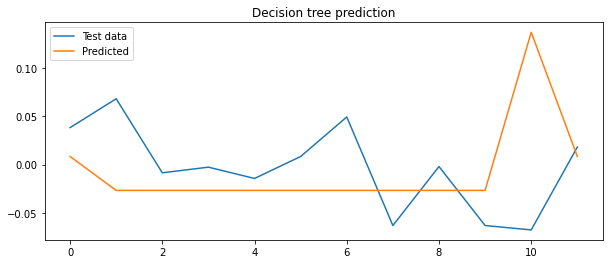

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decisiontree= DecisionTreeRegressor(random_state = 1)
model = decisiontree.fit(X[:40], Y[:40])
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

dt_mse = mean_squared_error(y_test, y_test_pred)

plt.rcParams['figure.figsize'] = (10,4)
plt.plot(y_test,label = 'Test data')
plt.plot(y_test_pred, label = 'Predicted')
plt.title('Decision tree prediction')
plt.legend()

dt_mse

# Hyperparameter search for decision tree

In [ ]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.metrics import make_scorer
import xgboost as xgb
from functools import partial
from xgboost import XGBRegressor
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, STATUS_FAIL
from sklearn.metrics import make_scorer
#import xgboost 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

from xgboost import plot_importance

from sklearn.ensemble import AdaBoostRegressor
def train_dt(params, X_train, y_train, X_test):

    splitter = params["splitter"]
    max_depth= params["max_depth"]

    model = DecisionTreeRegressor(splitter=splitter, 
                                 max_depth=max_depth, 
                                max_features = params["max_features"],
                                criterion=params['criterion'],
                                min_samples_leaf= params['min_samples_leaf'],
                                min_samples_split= params['min_samples_split'])

    result = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    return(pred)
 
def validate_dt(params,X_train,y_train,X_test,y_test):
    prediction = []

    n = len(y_test)
    splitter = params["splitter"]
    max_depth= params["max_depth"]

    model = DecisionTreeRegressor(splitter=splitter, 
                                 max_depth=max_depth, 
                                max_features = params["max_features"],
                                criterion=params['criterion'],
                                min_samples_leaf= params['min_samples_leaf'],
                                min_samples_split= params['min_samples_split'])
                          
    for i in range(n):
        prediction.extend(train_dt(params, X_train, y_train, X_test[i:i+1]))
        X_train = X_train.append(X_test[i:i+1])
        y_train = Y[:30+i+1]
        #print(i)
    mse = mean_squared_error(prediction,y_test)

    return {
        "loss": mse,
        "status": STATUS_OK,
        "model": model
    }

    
def optimize_dt(X_train, y_train,X_test, y_test, max_evals=10):
    space = {
        "splitter":hp.choice('splitter',['best','random']),
        "max_depth": hp.quniform("max_depth", 1, 15, 1),
        'max_features':hp.choice('max_features',['sqrt', 'auto', 'log2']),
        'criterion':hp.choice('criterion',['squared_error', 'friedman_mse', 'absolute_error']),
        'min_samples_split':hp.choice('min_samples_split',[5,6,7,8,9]),
        'min_samples_leaf':hp.choice('min_samples_leaf',[1,2,3,4])
    }

    objective_fn = partial(validate_dt, 
                           X_train=X_train, 
                           y_train=y_train,
                           X_test = X_test,
                           y_test = y_test)
    
    trials = Trials()
    best = fmin(fn=objective_fn,
                space=space,
                algo=tpe.suggest,
                max_evals=max_evals,
                trials=trials)

    # evaluate the best model on the test set
    print(best)
    return best, trials

In [ ]:
best_bt2, trials_bt2 = optimize_dt(X_train, y_train, X_val, y_val, max_evals=100)

100%|██████████| 100/100 [00:06<00:00, 15.64it/s, best loss: 0.0038057920731249376]
{'criterion': 2, 'max_depth': 12.0, 'max_features': 0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 1}


In [ ]:
trials_bt2.best_trial['result']['model']

DecisionTreeRegressor(criterion='absolute_error', max_depth=12.0,
                      max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=7, splitter='random')

0.004814571525219476

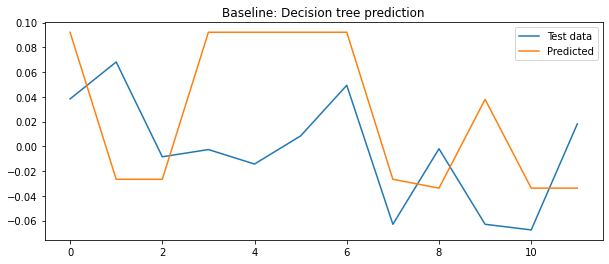

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
#DecisionTreeRegressor(criterion='absolute_error', max_depth=13.0,
 #                     max_features='sqrt', min_samples_leaf=4,
  #                    min_samples_split=7)

# Decision tree
from sklearn.tree import DecisionTreeRegressor

decisiontree= DecisionTreeRegressor(criterion='absolute_error', max_depth=12.0,
                      max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=7, splitter='random',random_state = 2)
model = decisiontree.fit(X[:40], Y[:40])
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
dt_mse_base = mean_squared_error(y_test, y_test_pred)
dt_mae_base = mean_absolute_error(y_test, y_test_pred)
dt_rmse_base = np.sqrt(mean_squared_error(y_test, y_test_pred))

plt.rcParams['figure.figsize'] = (10,4)
plt.plot(y_test,label = 'Test data')
plt.plot(y_test_pred, label = 'Predicted')
plt.title('Baseline: Decision tree prediction')
plt.legend()

dt_mse_base

# Creating feature set including sentiment score for rest of the models 

In [ ]:
def ts_features(data):
    features = pd.DataFrame()
    features['Vader_lag1'] = data['scaled_weighted_sentiment_vader'].shift(1).values
    features['Vader_lag2'] = data['scaled_weighted_sentiment_vader'].shift(2).values
    features['Vader_lag3'] = data['scaled_weighted_sentiment_vader'].shift(3).values
    features['txtblb_lag1'] = data['scaled_weighted_sentiment_textblob'].shift(1).values
    features['txtblb_lag2'] = data['scaled_weighted_sentiment_textblob'].shift(2).values
    features['txtblb_lag3'] = data['scaled_weighted_sentiment_textblob'].shift(3).values
    features['change_lag1'] = data['change'].shift(1).values
    features['change_lag2'] = data['change'].shift(2).values
    features['change_lag3'] = data['change'].shift(3).values
    features['adjcl1'] = data['Adj Close'].shift(1).values
    features['adjcl2'] = data['Adj Close'].shift(2).values
    features['adjcl3'] = data['Adj Close'].shift(3).values
    features["month"] = data.index.month
    features["week"] = data.index.week
    features["day_of_week"] = data.index.day_of_week
    #it will be probably useful to add a feature with num of hodidays in that month as well
    features.index = data.index
    features = features[3:]
    target = df['change'].values[3:]
    return features, target

X,Y = ts_features(df)

In [ ]:
X.head()

,Vader_lag1,Vader_lag2,Vader_lag3,txtblb_lag1,txtblb_lag2,txtblb_lag3,change_lag1,change_lag2,change_lag3,adjcl1,adjcl2,adjcl3,month,week,day_of_week
Date,,,,,,,,,,,,,,,
2016-04-01,0.209634,0.213004,0.213694,0.053849,0.067648,0.136351,-0.019481,0.024676,0.090260,0.276624,0.296104,0.271428,4,13,4
2016-04-04,0.208101,0.209634,0.213004,0.042725,0.053849,0.067648,-0.012337,-0.019481,0.024676,0.264286,0.276624,0.296104,4,14,0
2016-04-05,0.418465,0.208101,0.209634,0.053300,0.042725,0.053849,-0.011689,-0.012337,-0.019481,0.252597,0.264286,0.276624,4,14,1
2016-04-06,0.217599,0.418465,0.208101,0.123235,0.053300,0.042725,-0.018832,-0.011689,-0.012337,0.233766,0.252597,0.264286,4,14,2
2016-04-07,0.211169,0.217599,0.418465,0.056009,0.123235,0.053300,0.024675,-0.018832,-0.011689,0.258441,0.233766,0.252597,4,14,3


In [ ]:
len(X)


52

In [ ]:
test_n = 12
val_n = 10

X_train = X[:-test_n-val_n]
X_val = X[-val_n-test_n:-test_n]
X_test = X[-test_n:]

y_val = Y[-val_n-test_n:-test_n]
y_train = Y[:-test_n-val_n]
y_test = Y[-test_n :]

# Decision tree


## Hyperparameter search 

In [ ]:
best_dt, trials_dt = optimize_dt(X_train, y_train, X_val, y_val, max_evals=100)

100%|██████████| 100/100 [00:10<00:00,  9.65it/s, best loss: 0.0036391837802407256]
{'criterion': 2, 'max_depth': 2.0, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 0}


In [ ]:
trials_dt.best_trial['result']['model']

DecisionTreeRegressor(criterion='absolute_error', max_depth=2.0,
                      max_features='log2', min_samples_leaf=2,
                      min_samples_split=9)

0.003277858311356068

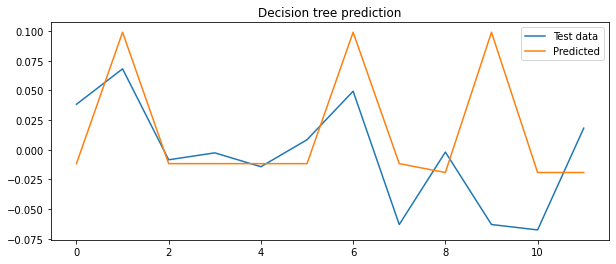

In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor


decisiontree = DecisionTreeRegressor(criterion='absolute_error', max_depth=2.0,
                      max_features='log2', min_samples_leaf=2,
                      min_samples_split=9, random_state = 1)
model = decisiontree.fit(X[:40], Y[:40])
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
dt_mse = mean_squared_error(y_test, y_test_pred)
dt_mae = mean_absolute_error(y_test, y_test_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

plt.rcParams['figure.figsize'] = (10,4)
plt.plot(y_test,label = 'Test data')
plt.plot(y_test_pred, label = 'Predicted')
plt.title('Decision tree prediction')
plt.legend()

dt_mse

# Random forest

In [ ]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.metrics import make_scorer
import xgboost as xgb
from functools import partial
from xgboost import XGBRegressor
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, STATUS_FAIL
from sklearn.metrics import make_scorer
#import xgboost 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

from xgboost import plot_importance

from sklearn.ensemble import AdaBoostRegressor
def train_rf(params, X_train, y_train, X_test):

    n_estimators = int(params["n_estimators"])
    max_depth= params["max_depth"]

    model = RandomForestRegressor(n_estimators=n_estimators, 
                                 max_depth=max_depth, 
                                max_features = params["max_features"],
                                #criterion=params['criterion'],
                                min_samples_leaf= params['min_samples_leaf'],
                                min_samples_split= params['min_samples_split'],
                                 bootstrap=params["bootstrap"])

    result = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    return(pred)
 
def validate_rf(params,X_train,y_train,X_test,y_test):
    prediction = []

    n = len(y_test)
    n_estimators = int(params["n_estimators"])
    max_depth= params["max_depth"]
    
    model = RandomForestRegressor(n_estimators=n_estimators, 
                                 max_depth=max_depth, 
                                max_features = params["max_features"],
                                #criterion=params['criterion'],
                                min_samples_leaf= params['min_samples_leaf'],
                                min_samples_split= params['min_samples_split'],
                                 bootstrap=params["bootstrap"])
                          
    for i in range(n):
        prediction.extend(train_rf(params, X_train, y_train, X_test[i:i+1]))
        X_train = X_train.append(X_test[i:i+1])
        y_train = Y[:30+i+1]
        #print(i)
    mse = mean_squared_error(prediction,y_test)

    return {
        "loss": mse,
        "status": STATUS_OK,
        "model": model
    }

    
def optimize_rf(X_train, y_train,X_test, y_test, max_evals=10):
    space = {
        "n_estimators": hp.quniform("n_estimators", 100, 1000, 10),
        "max_depth": hp.quniform("max_depth", 1, 15, 1),
        'max_features':hp.choice('max_features',['sqrt', 'auto']),
        #'criterion':hp.choice('criterion',['gini','entropy']),
        'min_samples_split':hp.choice('min_samples_split',[5,6,7,8,9]),
        'min_samples_leaf':hp.choice('min_samples_leaf',[1,2,3,4]),
        "bootstrap": hp.choice("bootstrap", [True,False])
    }

    objective_fn = partial(validate_rf, 
                           X_train=X_train, 
                           y_train=y_train,
                           X_test = X_test,
                           y_test = y_test)
    
    trials = Trials()
    best = fmin(fn=objective_fn,
                space=space,
                algo=tpe.suggest,
                max_evals=max_evals,
                trials=trials)

    # evaluate the best model on the test set
    print(best)
    return best, trials

In [ ]:

best_rf, trials_rf = optimize_rf(X_train, y_train, X_val, y_val, max_evals=100)

100%|██████████| 100/100 [08:34<00:00,  5.15s/it, best loss: 0.004544894906857358]
{'bootstrap': 1, 'max_depth': 1.0, 'max_features': 1, 'min_samples_leaf': 0, 'min_samples_split': 2, 'n_estimators': 100.0}


In [ ]:
trials_rf.best_trial['result']['model']

RandomForestRegressor(bootstrap=False, max_depth=1.0, min_samples_split=7)

0.001832506760553492

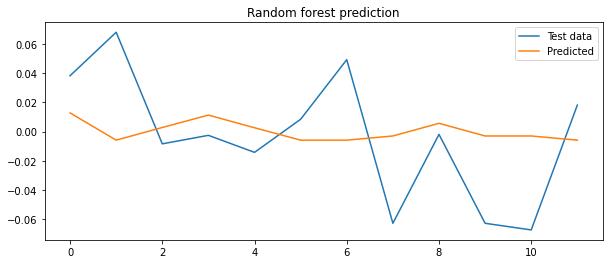

In [ ]:
#random forest
from sklearn.ensemble import RandomForestRegressor


randomforest = RandomForestRegressor(random_state = 2, bootstrap=False, max_depth=1.0, min_samples_split=7, min_samples_leaf=1, max_features='sqrt')

model=randomforest.fit(X[:40], Y[:40])
y_test_pred = model.predict(X_test)

random_mse = mean_squared_error(y_test, y_test_pred)
random_mae = mean_absolute_error(y_test, y_test_pred)
random_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
plt.plot(y_test,label = 'Test data')
plt.plot(y_test_pred, label = 'Predicted')
plt.title('Random forest prediction')
plt.legend()
random_mse

# XGBoost model

In [ ]:
from xgboost import XGBRegressor as xgb

xgbc = xgb(max_depth = 10, learning_rate = 0.06, n_estimators = 700)
xgbc.fit(X_train, y_train)
y_test_pred = xgbc.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_test_pred)
xgb_mse

[15:46:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.0025545703335362485

## Hyperparameter XGBoost 

In [ ]:
from sklearn.metrics import make_scorer
import xgboost as xgb
from functools import partial
from xgboost import XGBRegressor
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, STATUS_FAIL
from sklearn.metrics import make_scorer
#import xgboost 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

from xgboost import plot_importance

from sklearn.ensemble import AdaBoostRegressor
def train_xgb(params, X_train, y_train, X_test):

    n_estimators = int(params["n_estimators"])
    max_depth= int(params["max_depth"])

    model = XGBRegressor(n_estimators=n_estimators, 
                                 max_depth=max_depth, 
                                 learning_rate=params["learning_rate"],
                                 subsample=params["subsample"])

    result = model.fit(X_train, 
                       y_train.ravel(),
                        eval_set=[(X_train, y_train.ravel())],
                        early_stopping_rounds=50,
                        verbose=False)
    pred = model.predict(X_test)
    return(pred)
 
def validate(params,X_train,y_train,X_test,y_test):
    prediction = []

    n = len(y_test)
    n_estimators = int(params["n_estimators"])
    max_depth= int(params["max_depth"])
    gamma = int(params['gamma'])
    model = XGBRegressor(n_estimators=n_estimators, 
                                 max_depth=max_depth, 
                                 learning_rate=params["learning_rate"],
                                 subsample=params["subsample"])
    for i in range(n):
        prediction.extend(train_xgb(params, X_train, y_train, X_test[i:i+1]))
        X_train = X_train.append(X_test[i:i+1])
        y_train = Y[:30+i+1]
        #print(i)
    mse = mean_squared_error(prediction,y_test)

    return {
        "loss": mse,
        "status": STATUS_OK,
        "model": model
    }

    
def optimize_xgb(X_train, y_train,X_test, y_test, max_evals=10):
    space = {
        "n_estimators": hp.quniform("n_estimators", 100, 1000, 10),
        "max_depth": hp.quniform("max_depth", 1, 15, 1),
        "learning_rate": hp.quniform("learning_rate", 0.0001, 0.7, 0.0005),
        "subsample": hp.uniform("subsample", 0.8, 1),
        "gamma": hp.quniform("gamma", 0, 100, 1)
    }

    objective_fn = partial(validate, 
                           X_train=X_train, 
                           y_train=y_train,
                           X_test = X_test,
                           y_test = y_test)
    
    trials = Trials()
    best = fmin(fn=objective_fn,
                space=space,
                algo=tpe.suggest,
                max_evals=max_evals,
                trials=trials)

    # evaluate the best model on the test set
    print(f"""
    Best parameters:
        learning_rate: {best["learning_rate"]} 
        n_estimators: {best["n_estimators"]}
        max_depth: {best["max_depth"]}
        sub_sample: {best["subsample"]}
        gamma: {best["gamma"]}
    """)
    return best, trials



In [ ]:
best4, trials4= optimize_xgb(X_train, y_train, X_val, y_val, max_evals=100)

[16:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
best4

{'gamma': 42.0,
 'learning_rate': 0.302,
 'max_depth': 2.0,
 'n_estimators': 600.0,
 'subsample': 0.8839716960982944}

In [ ]:
from xgboost import XGBRegressor as xgb


xgbc = xgb(learning_rate= 0.302,
        n_estimators= 600,
        max_depth = 2,
        sub_sample= 0.8839716960982944)
xgbc.fit(X[:40], Y[:40])
y_test_pred = xgbc.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_test_pred)
xgb_mae = mean_absolute_error(y_test, y_test_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
xgb_mse

[15:46:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.001594414051038096

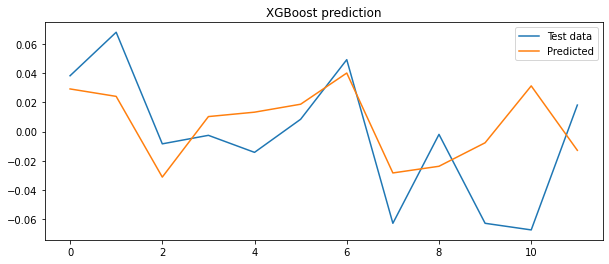

In [ ]:
plt.plot(y_test,label = 'Test data')
plt.plot(y_test_pred, label = 'Predicted')
plt.title('XGBoost prediction')
plt.legend()

# SVM model

0.009798709102299045


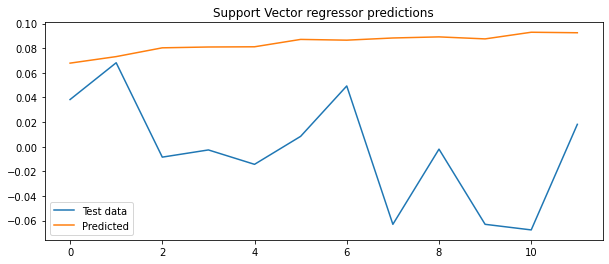

In [ ]:
from sklearn import svm
svm_mod = svm.SVR()
svm_mod.fit(X_train, y_train)
y_test_pred = svm_mod.predict(X_test)
svm_mse = mean_squared_error(y_test, y_test_pred)
print(svm_mse)
plt.plot(y_test,label = 'Test data')
plt.plot(y_test_pred, label = 'Predicted')
plt.title('Support Vector regressor predictions')
plt.legend()

## Hyperparameter SVM


In [ ]:
def train_svm(params, X_train, y_train, X_test):



    model =  svm.SVR(kernel = params['kernel'],
                      gamma = params['gamma'],
                      epsilon = params['epsilon'],
                      shrinking = params['shrinking'])
    result = model.fit(X_train, 
                       y_train)
    pred = model.predict(X_test)
    return(pred)
 
def validate_svm(params,X_train,y_train,X_test,y_test):
    prediction = []
    print(params)

    n = len(y_test)

    model = svm.SVR(kernel = params['kernel'],
                      gamma = params['gamma'],
                      epsilon = params['epsilon'],
                      shrinking = params['shrinking'])
    for i in range(n):
        prediction.extend(train_svm(params, X_train, y_train, X_test[i:i+1]))
        X_train = X_train.append(X_test[i:i+1])
        y_train = Y[:30+i+1]
        #print(i)
    mse = mean_squared_error(prediction,y_test)
    
    return {
        "loss": mse,
        "status": STATUS_OK,
        "model": model
    }

    
def optimize_svm(X_train, y_train,X_test, y_test, max_evals=10):
    space = {
        "kernel": hp.choice("kernel", ['linear', 'poly', 'rbf', 'sigmoid']),
        "epsilon": hp.quniform("epsilon", 0.1, 1, 0.0005),
        "shrinking": hp.choice("shrinking",[True,False]),
        "gamma": hp.choice("gamma", ['scale','auto'])
    }

    objective_fn = partial(validate_svm, 
                           X_train=X_train, 
                           y_train=y_train,
                           X_test = X_test,
                           y_test = y_test)
    
    trials = Trials()
    best = fmin(fn=objective_fn,
                space=space,
                algo=tpe.suggest,
                max_evals=max_evals,
                trials=trials)

    # evaluate the best model on the test set
    print(best)
    return best, trials


In [ ]:
best_svm, trials_svm = optimize_svm(X_train, y_train, X_val, y_val, max_evals=100)

{'epsilon': 0.515, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': False}
{'epsilon': 0.7465, 'gamma': 'auto', 'kernel': 'linear', 'shrinking': False}
{'epsilon': 0.40800000000000003, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': False}
{'epsilon': 0.9345, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}
{'epsilon': 0.9460000000000001, 'gamma': 'scale', 'kernel': 'sigmoid', 'shrinking': False}
{'epsilon': 0.456, 'gamma': 'auto', 'kernel': 'linear', 'shrinking': False}
{'epsilon': 0.4255, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': False}
{'epsilon': 0.6950000000000001, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': False}
{'epsilon': 0.858, 'gamma': 'auto', 'kernel': 'sigmoid', 'shrinking': True}
{'epsilon': 0.541, 'gamma': 'auto', 'kernel': 'linear', 'shrinking': False}
{'epsilon': 0.155, 'gamma': 'auto', 'kernel': 'poly', 'shrinking': True}
{'epsilon': 0.40700000000000003, 'gamma': 'auto', 'kernel': 'linear', 'shrinking': False}
{'epsilon': 0.6485, 'gamma': 'auto', '

0.0026474240026304508


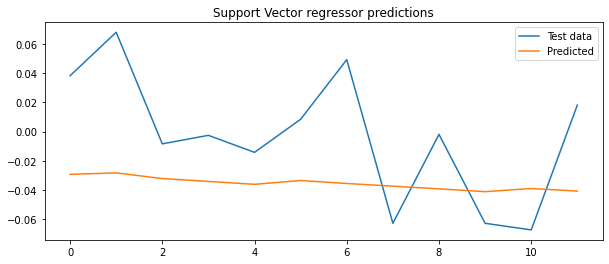

In [ ]:
svm_mod = svm.SVR(epsilon = 0.13, gamma = 'scale', kernel = 'sigmoid', shrinking = False )
svm_mod.fit(X_train, y_train)
y_test_pred = svm_mod.predict(X_test)
svm_mse = mean_squared_error(y_test, y_test_pred)
svm_mae = mean_absolute_error(y_test, y_test_pred)
svm_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(svm_mse)
plt.plot(y_test,label = 'Test data')
plt.plot(y_test_pred, label = 'Predicted')
plt.title('Support Vector regressor predictions')
plt.legend()

In [ ]:
from tabulate import tabulate
table = [['Model', 'MSE', 'MAE', 'RMSE'], ['Baseline Desicion tree',dt_mse_base, dt_mae_base, dt_rmse_base], ['Desicion tree',dt_mse, dt_mae, dt_rmse], ['Random forest', random_mse, random_mae, random_rmse],['SVM', svm_mse, svm_mae,svm_rmse],['XGBoost', xgb_mse, xgb_mae, xgb_rmse]]

In [ ]:
print(tabulate(table))

----------------------  ---------------------  --------------------  -------------------
Model                   MSE                    MAE                   RMSE
Baseline Desicion tree  0.004814571525219476   0.06247284912109582   0.06938711353860655
Desicion tree           0.003277858311356068   0.04015157302151003   0.05725258344700323
Random forest           0.001832506760553492   0.03560802133318867   0.04280778855013994
SVM                     0.0026474240026304508  0.045068238366188264  0.05145312432331443
XGBoost                 0.001594414051038096   0.03146375891167138   0.03993011458834167
----------------------  ---------------------  --------------------  -------------------
